import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line
# Before your start:

- Comment as much as you can and use the resources
- Happy learning!

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Challenge 1 - Reading and Standardizing the Data

In this challenge we will work with image data and reduce the dimensions of the data to create a 2 dimensional plot. While we have not worked much with image data before, it can be represented as a numpy array where each pixel is assigned a numeric value. In this lesson, we will look at a dataset of cats and a dataset of dogs and see whether reducing them to two dimensions allows us to see if the data is separable. We will start by loading and processing the data. Run the cell below to load the two csv files and convert them into numpy arrays.

## Read the files into dataframes named `dogs` and `cats`

In [31]:
dogs = pd.read_csv('../data/dogs.csv')

In [32]:
cats = pd.read_csv('../data/cats.csv')

Next, we'll examine the shape of both the cats and the dogs arrays. Print out both shapes below.

In [33]:
dogs.shape

(80, 4096)

In [34]:
cats.shape

(80, 4096)

What this means is that both arrays contain 80 images each (the number of rows). Each image is comprised of 64x64 pixels (so a total of 4096 pixels per image). The images have been flattened such that all 4096 are in a single row.

Print out row 0 of the cats dataframe to see what the pixels values look like.

In [35]:
cats.head(1)

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,64,64,64,64,64,77,77,64,64,77,...,22,36,36,36,47,77,64,61,61,61


Using `matplotlib` we can plot a single cat or a single dog. We do this by reshaping the observation vector back to a squared image and then using the `imshow` function.

Plot the image of the first cat and dog of your dataframes

_Extra: you can play with `imshow`'s argument `cmap` to see which colors are suitable for visualization_

In [36]:
reshape_dogs = np.array(dogs.loc[0,:]).reshape(64,64)

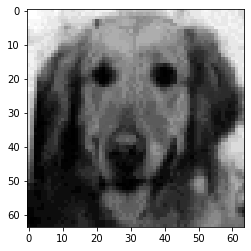

In [63]:
plt.imshow(reshape_dogs, cmap='gray')

In [38]:
reshape_cats = np.array(cats.loc[0,:]).reshape(64,64)

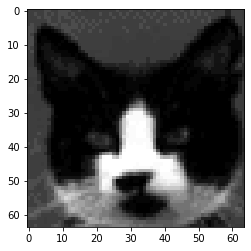

In [45]:
plt.imshow(reshape_cats, cmap='gray')

Now concatenate the cats and dogs dataframes. Make sure to put dogs first. This should result in a dataframe containing 160 observations and 4096 dimensions.

In [55]:
concat_df = pd.concat([dogs,cats]) 

Next, we would like to standardize our data. 

In order to do that, we will need to use the `StandardScaler` class from `sklearn.preprocessing` module.

Remember, we need to standardize the information for each pixel (which are the dimensions of our dataset) so that they can be compared in the PCA algorithm. Otherwise, the result would be dominated by the variable with the highest scale. 


In [58]:
scaler = StandardScaler()
X_std = scaler.fit_transform(np.array(concat_df))

## Bonus

After standardizing your data, try visualizing your image again. Does the standardization changes your original image?

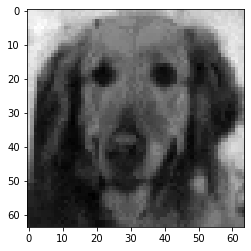

In [62]:
plt.imshow(X_std[0].reshape(64,64), cmap='gray')

# Challenge 2 - Using PCA

Now that we have created a standardized matrix of cats and dogs, we'll find the two most important components in the data. 

Load the PCA from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and apply the function to our standarized data. Create a PCA model with two components.

In [67]:
pca = PCA(n_components=2)
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [69]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.25550287 0.13038508]
[409.20209905 292.31689333]


After instantiating the `PCA class` and applying it to the standardized data, the results of your principal component analysis will be stored on the PCA object you've created (from the PCA class). 

# Challenge 3 - Plotting the Data

Now that we have reduced our cats and dogs arrays, we can plot the data in a way that the human eye can understand in 2-D. We can look at this plot to see whether there are differences between the cat and dog images. 

In the cell below, create a pandas dataframe containing the columns `pc1`, and `pc2` with the results of the first and second components of your results, respectively.

In [112]:
df = pd.DataFrame(pca.fit_transform(concat_df), columns= ['pc1', 'pc2']).reset_index()

In [113]:
df

,index,pc1,pc2
0,0,2850.919397,1829.086646
1,1,-1809.970098,2736.987457
2,2,1741.388813,-821.120092
3,3,-1493.727112,600.767536
4,4,1199.752621,1367.539532
...,...,...,...
155,155,37.118113,-1100.996975
156,156,-1006.658683,-1600.651632
157,157,-1060.814726,-1579.253484
158,158,-1007.894430,1146.333411


Create a labels list. This list will be of size 160. The first 80 elements in the list will be the word `blue`, and the last 80 elements will be `red`. This will ensure that all dog observations will be colored in blue and all cats will be colored in red. Name this list `colors`.

In [114]:
colors= []

for i in range(0,160):
    if i < 80:
        colors.append('blue')
    else:
        colors.append('red')

Create a scatter plot of `pc1` and `pc2` below. Use the `colors` list above to color the observations by setting `c=colors`.

In [115]:
pc1 = df['pc1']
pc2 = df['pc2']

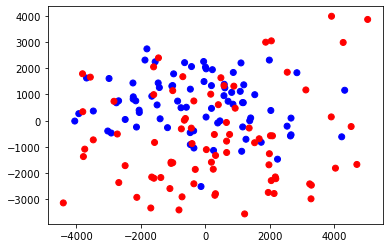

In [116]:
plt.scatter(pc1, pc2, c=colors)

Do you see a clear separation between cats and dogs? Write your answer below.

In [18]:
# I don't see a clear separation between dogs and cats

# Evaluate the results

Calculate how much explained variance do the results of your PCA has lead to.  

In [117]:
pca.explained_variance_ratio_

array([0.24412697, 0.14886231])

Explain with your own words what those values represent.

In [114]:
# your answer here:

# Bonus Challenge


Recreate your PCA using 20 components. You'll not be able to visualize the results this time, but the idea here is to plot a cumulative sum of your explained variance results. Follow the steps as before (i.e, create a dataframe containing the 20 components and so on)


What do you observe? How much of the information is retained after going from 4096 to 20 dimensions?

In [132]:
pca = PCA(n_components=20)
X_std = pca.fit_transform(concat_df)

pca.explained_variance_ratio_

array([0.24412697, 0.14886231, 0.07769424, 0.0484037 , 0.0415378 ,
       0.03300196, 0.02633179, 0.02322057, 0.01979218, 0.01715693,
       0.01567239, 0.01371103, 0.01156447, 0.01052269, 0.01028938,
       0.01009193, 0.00894316, 0.00847287, 0.00821455, 0.00774713])

# Bonus Challenge 2

Use the `.inverse_transform()` method to the dataframe with the 20 components and store your results. The inverse transform takes the results of the PCA (the reduced dimension space) and take it back to the original space (with 4096 dimensions). This will be helpful for you to visualize how the PCA affected the original data.

In [133]:
pca.inverse_transform(X_std)

array([[221.17395885, 221.36369794, 222.80736221, ..., 130.97795606,
        135.06182859, 144.73146929],
       [156.39357077, 157.37213258, 163.77713192, ..., 106.8630818 ,
        123.01335806, 130.25979079],
       [ 87.62793256,  88.93397059,  91.90320872, ..., 122.79593854,
        118.49540921, 117.47435594],
       ...,
       [ 44.93984955,  44.61677954,  47.09693598, ..., 124.58045005,
        117.52446945, 114.54766193],
       [235.01536666, 224.66058522, 224.88731532, ..., 203.58310241,
        196.00428812, 193.881456  ],
       [117.26222925, 112.26938037, 111.82342176, ...,  89.20567464,
         80.54206285,  81.22923983]])

Use the `imshow` to plot the first row of the `inverse_transform` of the results. Compare the results with the original image.

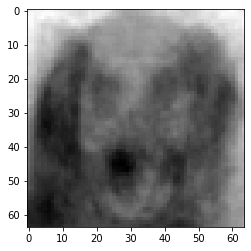

In [134]:
plt.imshow(pca.inverse_transform(X_std)[0].reshape(64,64), cmap='gray')

Change the value of the components above to have a feeling of the information retained (try 100 components).

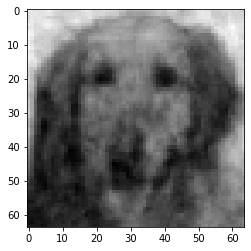

In [136]:
pca = PCA(n_components=100)
X_std = pca.fit_transform(concat_df)

pca.inverse_transform(X_std)
plt.imshow(pca.inverse_transform(X_std)[0].reshape(64,64), cmap='gray')

The results above demonstrate the power of the PCA analysis. It takes the best combination of your columns in such a way that it preserves the most of its information. So, although you lose some of the information, you effectively reduce the number of dimensions on your dataset. This can be important both for visualization purposes as well as for understanding the importance of each feature.